# PREDICTING RESERVOIR SIMULATION MODEL MISFIT FOR MORE ACCURATE SIMULATION AND FORECAST RESULTS - A REGRESSION PROBLEM
## AYOMIDE HAMZAT - 113486454
## PE5970 - DATA ANALYTICS PROJECT 2

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Importing necessary libraries and reading the data file

In [2]:
##Importing the data file
data = pd.read_csv("BP Reservoir Production History.csv")
data.head() 

Unnamed: 0  CASE      CGP      COP       CWI       CWP       PERM.1  \
0           0  mc_1  20929.5  57131.4   76539.7   1040.04   868.668293   
1           1  mc_2  32958.5  79457.8  112949.0  11029.80   745.167436   
2           2  mc_3  23547.1  61638.9   90928.4  14435.20  1512.409570   
3           3  mc_4  30035.1  77340.9  116231.0  13480.80  1387.967683   
4           4  mc_5  30322.5  85553.3  155647.0  55047.40  1696.679585   

       PERM.2    PORO.1    PORO.2  ...  CHAN.3  CHAN.4  CHAN.5  CHAN.6  \
0  181.057873  0.227704  0.248976  ...       1       1       0       0   
1  175.700384  0.212329  0.241203  ...       0       1       0       0   
2  167.897471  0.175986  0.235119  ...       1       0       1       0   
3  149.646131  0.196856  0.245666  ...       1       0       0       1   
4  170.632884  0.209433  0.197958  ...       0       0       0       0   

   CHAN.7  CHAN.8         mq  mq.FIELD.FIELD  mq.FIELD.FIELD.QOP  \
0       0       0  88.892641      130.676263          106.618008   
1       1       1  73.127937      107.171121           70.936962   
2       0       0  83.546055      123.168860          107.751226   
3       1       1  77.273477      116.029040           87.019680   
4       0       1  51.235426       74.517625           68.585237   

   mq.FIELD.FIELD.QWP  
0          154.734519  
1          143.405280  
2          138.586493  
3          145.038400  
4           80.450013  

[5 rows x 34 columns]

In [3]:
data.shape

(200711, 34)

In [4]:
data_subset = data.drop(data.columns[[0, 1, 31, 33]], axis=1)

In [5]:
data_subset.head() 

CGP      COP       CWI       CWP       PERM.1      PERM.2    PORO.1  \
0  20929.5  57131.4   76539.7   1040.04   868.668293  181.057873  0.227704   
1  32958.5  79457.8  112949.0  11029.80   745.167436  175.700384  0.212329   
2  23547.1  61638.9   90928.4  14435.20  1512.409570  167.897471  0.175986   
3  30035.1  77340.9  116231.0  13480.80  1387.967683  149.646131  0.196856   
4  30322.5  85553.3  155647.0  55047.40  1696.679585  170.632884  0.209433   

     PORO.2     NTG.1     NTG.2  ...  CHAN.1  CHAN.2  CHAN.3  CHAN.4  CHAN.5  \
0  0.248976  0.787131  0.195546  ...       0       0       1       1       0   
1  0.241203  0.737976  0.176411  ...       0       1       0       1       0   
2  0.235119  0.838949  0.222601  ...       0       0       1       0       1   
3  0.245666  0.885911  0.151226  ...       0       1       1       0       0   
4  0.197958  0.710940  0.281853  ...       1       0       0       0       0   

   CHAN.6  CHAN.7  CHAN.8         mq  mq.FIELD.FIELD.QOP  
0       0       0       0  88.892641          106.618008  
1       0       1       1  73.127937           70.936962  
2       0       0       0  83.546055          107.751226  
3       1       1       1  77.273477           87.019680  
4       0       0       1  51.235426           68.585237  

[5 rows x 30 columns]

In [6]:
data_subset.shape

(200711, 30)

Difficult to view all 30 variables on one pair plot so I make plot for the first 10 variables.
MQ and COP may appear left skewed and right skewed respectively, but there are no outliers in the dataset. Just the simulation results.

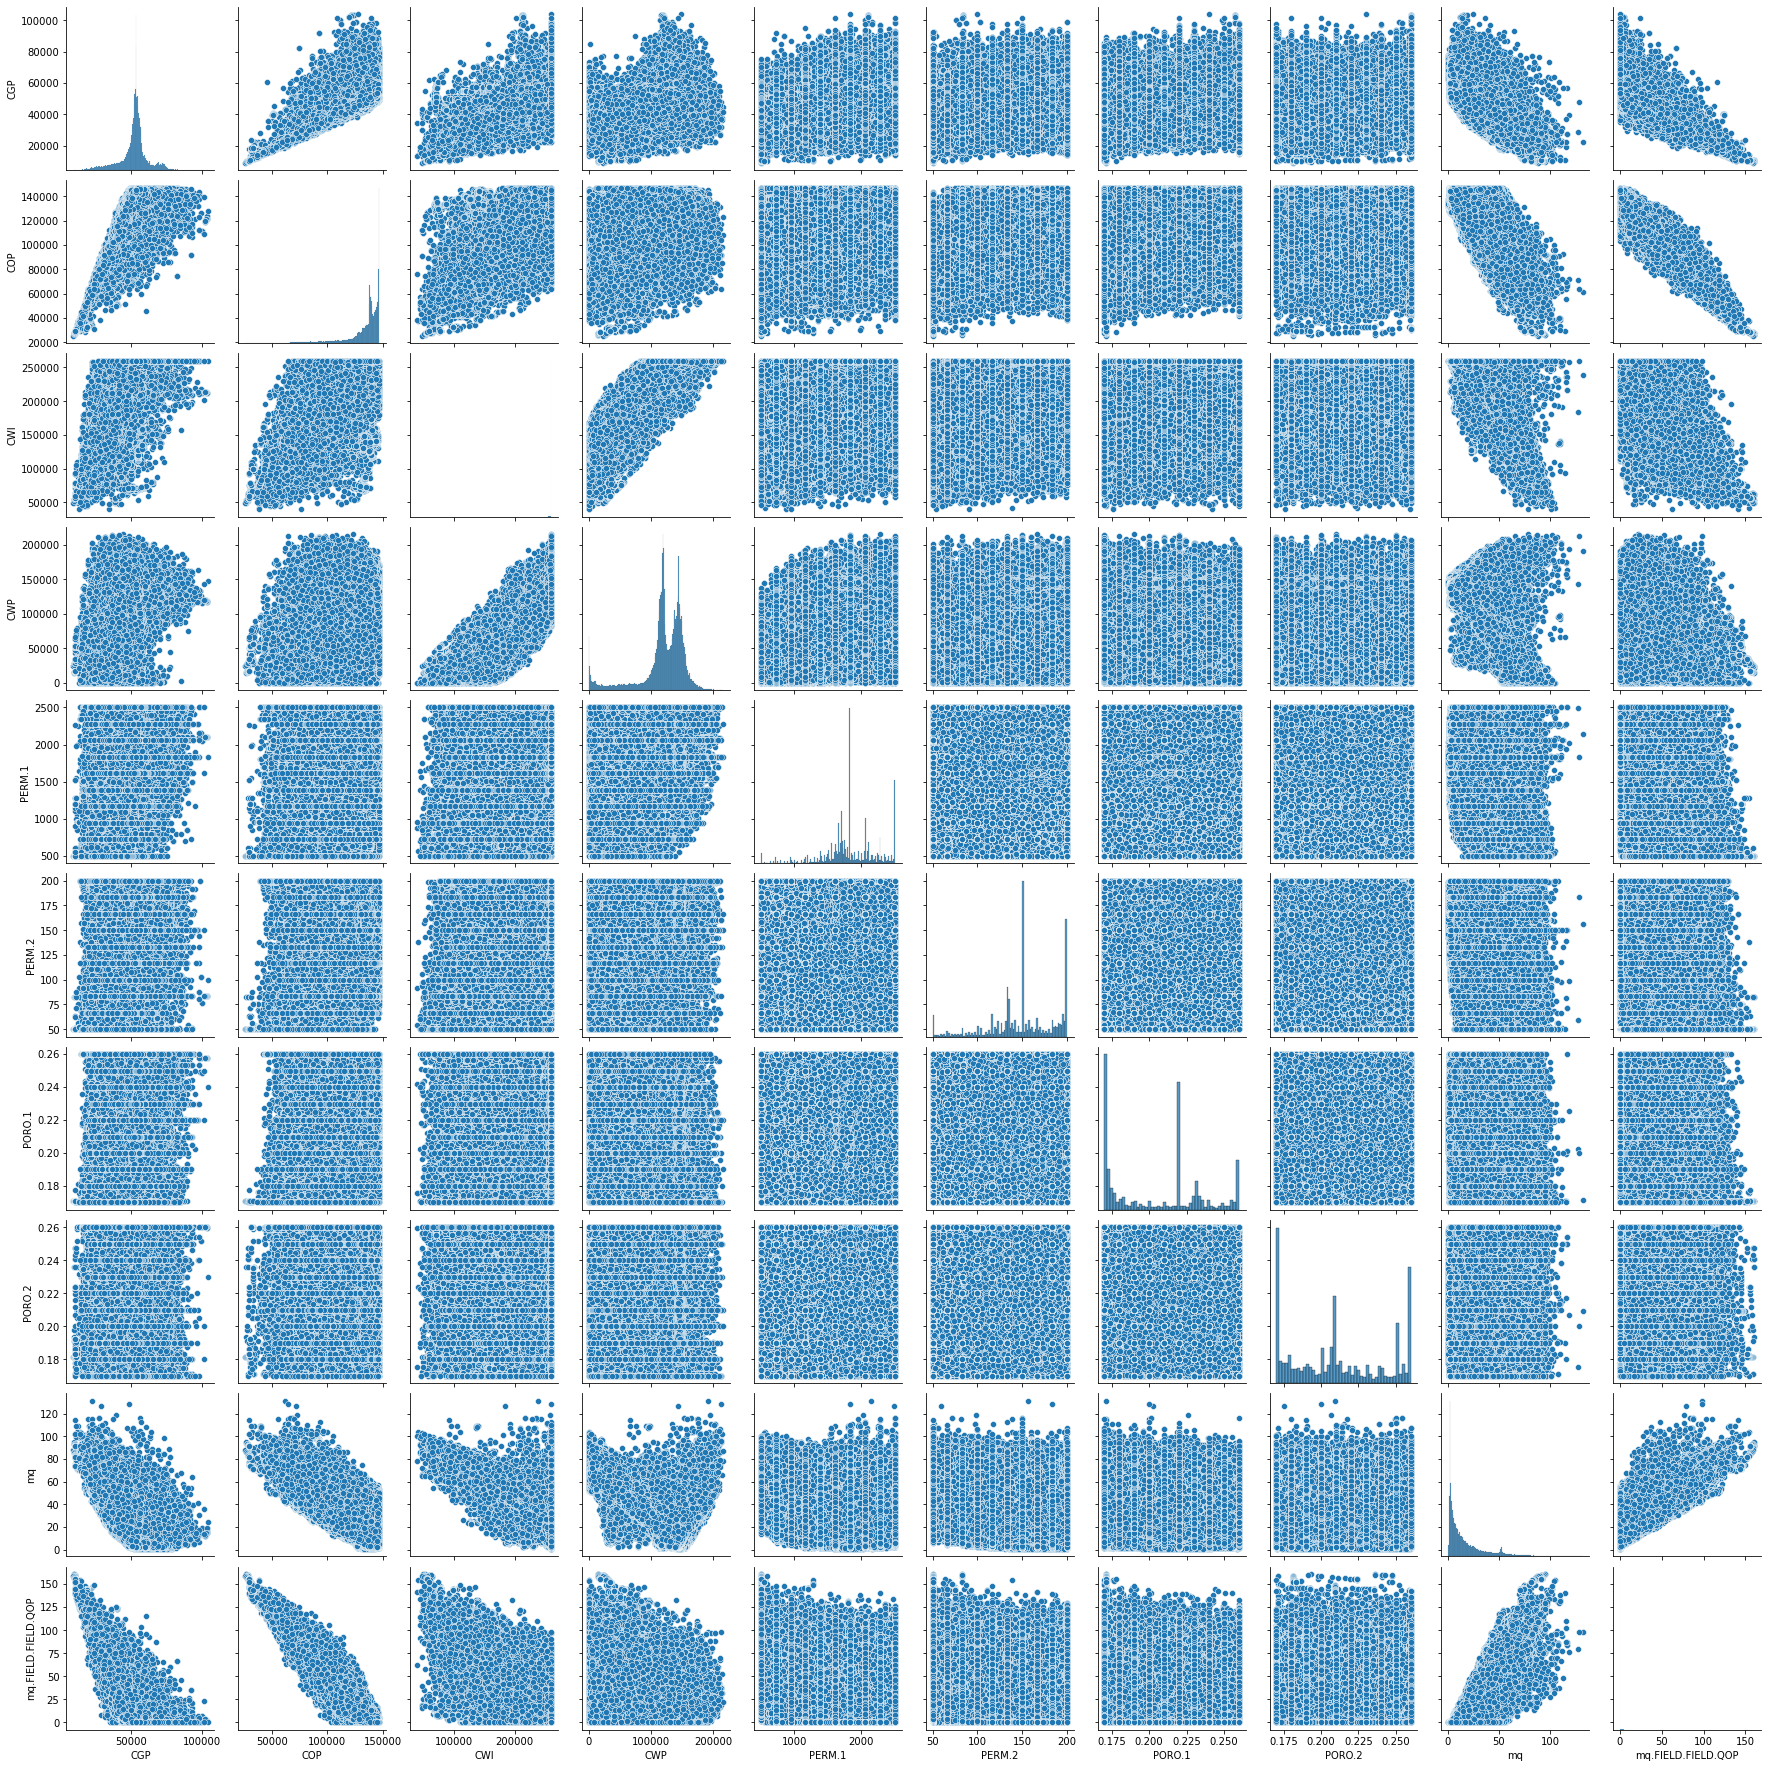

In [7]:
sns.pairplot(data_subset, vars = ['CGP', 'COP', 'CWI', 'CWP', 'PERM.1', 'PERM.2', 'PORO.1', 'PORO.2', 'mq', 'mq.FIELD.FIELD.QOP']) 

Now we will do a quick random forest and variable importance search to determine the most important features/variables in the data set for this regression problem

In [8]:
##Data Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Scale only the input data
input_data = data_subset[['CGP','COP','CWI','CWP','PERM.1','PERM.2','PORO.1','PORO.2','NTG.1','NTG.2','FAULT.1','FAULT.2','COW.1','CW.1','SORW.1','KRW_SWRO.1','COG.1','CG.1','SGR.1','SORG.1']].to_numpy()
CHAN = data_subset[['CHAN.1','CHAN.2','CHAN.3','CHAN.4','CHAN.5','CHAN.6','CHAN.7','CHAN.8']] #separating Binary data
data_scaled = scaler.fit_transform(input_data)
data_scaled_df = pd.DataFrame (data_scaled, columns = ['CGP','COP','CWI','CWP','PERM.1','PERM.2','PORO.1','PORO.2','NTG.1','NTG.2','FAULT.1','FAULT.2','COW.1','CW.1','SORW.1','KRW_SWRO.1','COG.1','CG.1','SGR.1','SORG.1'])
data_scaled_df = data_scaled_df.join(CHAN) #Adding binary data back to scaled data

In [9]:
mq_raw = data_subset[['mq']].to_numpy()
mq_raw_df = pd.DataFrame(mq_raw, columns = ['mq'])
data_scaled_df['mq'] = mq_raw_df #appending output to scaled data

In [10]:
data_scaled_df.isnull().sum().sum()

0

In [11]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(data_scaled_df, test_size = 0.30, random_state = 12 ) #large data set hence 0.3

In [12]:
x_train = train.drop('mq', axis=1) # Drop mq from the x-variables
y_train = train['mq']              # mq is the value being predicted, the y-variable

x_test = test.drop('mq', axis = 1) # Do the same for the test set
y_test = test['mq']

In [13]:
print("TRAINING DATA")
print("Size of x_train is:", x_train.shape)
print("Size of y_train is:", y_train.shape)
print("TEST DATA")
print("Size of x_test is:", x_test.shape)
print("Size of y_test is:", y_test.shape)

TRAINING DATA
Size of x_train is: (140497, 28)
Size of y_train is: (140497,)
TEST DATA
Size of x_test is: (60214, 28)
Size of y_test is: (60214,)


Now we do a random forest with randomly selected hyperparameters

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rfr = RandomForestRegressor(random_state = 12, bootstrap = True, max_depth = 6, min_samples_split = 20, n_estimators = 1000)

rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_split=20, n_estimators=1000,
                      random_state=12)

In [15]:
from math import sqrt

y_pred = rfr.predict(x_test)
test_R2 = rfr.score(x_test, y_test)
test_RMSE = sqrt(mean_squared_error(y_test, y_pred))
print("R2 = ", test_R2)
print("RMSE = ", test_RMSE)


R2 =  0.8935853403789858
RMSE =  6.233205313702092


Text(0.5, 1.0, 'TestR2 = 0.893585')

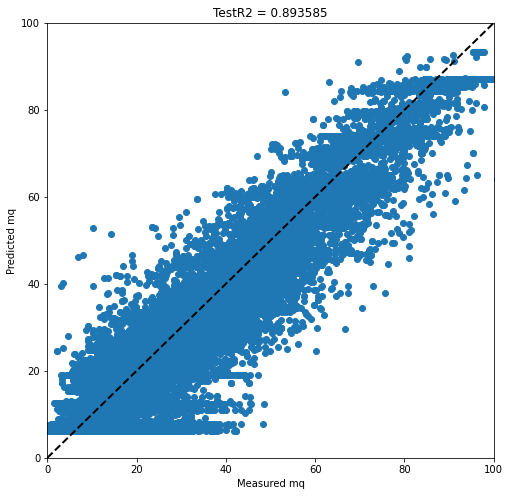

In [16]:
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 100, 0, 100])
plt.scatter(y_test, y_pred)
plt.plot([0,160],[0,160],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted mq') # Predicted values on y axis
plt.xlabel('Measured mq') 
plt.title('TestR2 = %f'%(test_R2))

In [17]:
importances = list(rfr.feature_importances_)

In [18]:
Input_Features = data_subset[['CGP','COP','CWI','CWP','PERM.1','PERM.2','PORO.1','PORO.2','NTG.1','NTG.2','FAULT.1','FAULT.2','COW.1','CW.1','SORW.1','KRW_SWRO.1','COG.1','CG.1','SGR.1','SORG.1','CHAN.1','CHAN.2','CHAN.3','CHAN.4','CHAN.5','CHAN.6','CHAN.7','CHAN.8']]
Output_Feature = mq_raw_df

In [19]:
feature_list=list(Input_Features[['CGP','COP','CWI','CWP','PERM.1','PERM.2','PORO.1','PORO.2','NTG.1','NTG.2','FAULT.1','FAULT.2','COW.1','CW.1','SORW.1','KRW_SWRO.1','COG.1','CG.1','SGR.1','SORG.1','CHAN.1','CHAN.2','CHAN.3','CHAN.4','CHAN.5','CHAN.6','CHAN.7','CHAN.8']].columns)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: CWP                  Importance: 0.56
Variable: CWI                  Importance: 0.22
Variable: COP                  Importance: 0.16
Variable: CGP                  Importance: 0.01
Variable: COW.1                Importance: 0.01
Variable: CW.1                 Importance: 0.01
Variable: CHAN.2               Importance: 0.01
Variable: PERM.1               Importance: 0.0
Variable: PERM.2               Importance: 0.0
Variable: PORO.1               Importance: 0.0
Variable: PORO.2               Importance: 0.0
Variable: NTG.1                Importance: 0.0
Variable: NTG.2                Importance: 0.0
Variable: FAULT.1              Importance: 0.0
Variable: FAULT.2              Importance: 0.0
Variable: SORW.1               Importance: 0.0
Variable: KRW_SWRO.1           Importance: 0.0
Variable: COG.1                Importance: 0.0
Variable: CG.1                 Importance: 0.0
Variable: SGR.1                Importance: 0.0
Variable: SORG.1               Importance: 0.0
Variab

<AxesSubplot:xlabel='Importance', ylabel='Input_Features'>

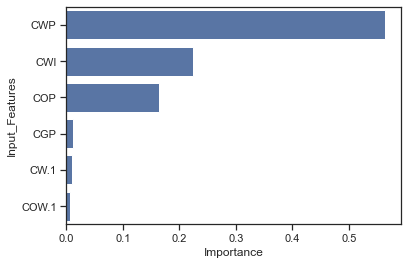

In [20]:
feature_dataframe = pd.DataFrame(data = feature_list, columns = ['Input_Features'])

feature_dataframe['Importance'] = importances
feature_dataframe.sort_values('Importance',inplace=True)
feature_dataframe = feature_dataframe.nlargest(6, 'Importance') # Plotting the 6 most important features
sns.set(style = 'ticks')
sns.barplot(x = 'Importance', y = 'Input_Features', data = feature_dataframe, color="b")

Now we run regression on the data by seleectiing the first 6 variables in terms of importance

In [21]:
regressioninput = data_subset[['CWP','CWI','COP','CGP','COW.1','CW.1']].to_numpy() 
regressionoutput = data_subset[['mq']].to_numpy() #new dataset for the regresssion using the 6 most important input variables

In [22]:
regressiondata_scaled = scaler.fit_transform(regressioninput)
regressiondata_scaled_df = pd.DataFrame (regressiondata_scaled, columns = ['CWP','CWI','COP','CGP','COW.1','CW.1'])

In [23]:
regressionoutput_df = pd.DataFrame(regressionoutput, columns = ['mq'])
regressiondata_scaled_df['mq'] = regressionoutput_df

In [24]:
regressiondata_scaled_df.isnull().sum().sum()

0

In [25]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(regressiondata_scaled_df, test_size = 0.30, random_state = 12 )

In [26]:
xreg_train = train.drop('mq', axis=1)
yreg_train = train['mq']              

xreg_test = test.drop('mq', axis = 1)
yreg_test = test['mq']

In [27]:
print("TRAINING DATA")
print("Size of xreg_train is:", xreg_train.shape)
print("Size of yreg_train is:", yreg_train.shape)
print("TEST DATA")
print("Size of xreg_test is:", xreg_test.shape)
print("Size of yreg_test is:", yreg_test.shape)

TRAINING DATA
Size of xreg_train is: (140497, 6)
Size of yreg_train is: (140497,)
TEST DATA
Size of xreg_test is: (60214, 6)
Size of yreg_test is: (60214,)


RF with randomly selected hyperparameters

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

rfr = RandomForestRegressor(random_state = 12, bootstrap = True, max_depth = 6, min_samples_split = 20, n_estimators = 1000)

rfr.fit(xreg_train, yreg_train)

RandomForestRegressor(max_depth=6, min_samples_split=20, n_estimators=1000,
                      random_state=12)

In [29]:
yreg_pred = rfr.predict(xreg_test)
test_R2_rgd = rfr.score(xreg_test, yreg_test) #test R2 for RF using new regression data
test_RMSE_rgd = sqrt(mean_squared_error(yreg_test, yreg_pred)) #test RMSE for RF using new regression data
print("R2 = ", test_R2_rgd)
print("RMSE = ", test_RMSE_rgd)

R2 =  0.8832389253848794
RMSE =  6.529196569910171


Text(0.5, 1.0, 'TestR2 = 0.883239')

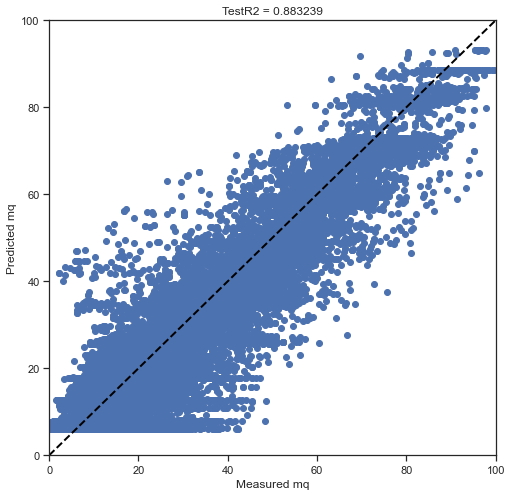

In [30]:
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 100, 0, 100])
plt.scatter(yreg_test, yreg_pred)
plt.plot([0,160],[0,160],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted mq') 
plt.xlabel('Measured mq') 
plt.title('TestR2 = %f'%(test_R2_rgd))

Grid search cross-validation for hyperparameter optimization.

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [6, 10, 15], 'min_samples_split': [10, 20], 'n_estimators': [100, 200]}

grid = GridSearchCV(RandomForestRegressor(random_state=12), param_grid=param_grid, verbose=3, cv=5)

grid.fit(xreg_train, yreg_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100, score=0.886, total=  55.7s
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.6s remaining:    0.0s


[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100, score=0.884, total= 1.1min
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.1min remaining:    0.0s


[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100, score=0.889, total=  59.3s
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100, score=0.886, total= 1.1min
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100, score=0.889, total=  57.0s
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=200, score=0.886, total= 2.0min
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=200, score=0.884, total= 2.2min
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=200, score=0.889, total= 2.2min
[CV] bootstrap=Tru

[CV]  bootstrap=True, max_depth=15, min_samples_split=10, n_estimators=200, score=0.952, total= 3.1min
[CV] bootstrap=True, max_depth=15, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, min_samples_split=20, n_estimators=100, score=0.950, total= 1.6min
[CV] bootstrap=True, max_depth=15, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, min_samples_split=20, n_estimators=100, score=0.948, total= 1.6min
[CV] bootstrap=True, max_depth=15, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, min_samples_split=20, n_estimators=100, score=0.950, total= 1.7min
[CV] bootstrap=True, max_depth=15, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, min_samples_split=20, n_estimators=100, score=0.949, total= 1.5min
[CV] bootstrap=True, max_depth=15, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, min_samples_split=20, n_estimators=100, score=0.951, total= 1.6min
[CV] bo

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 108.9min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12),
             param_grid={'bootstrap': [True], 'max_depth': [6, 10, 15],
                         'min_samples_split': [10, 20],
                         'n_estimators': [100, 200]},
             verbose=3)

In [32]:
cv_results = pd.DataFrame(grid.cv_results_)

# generate a subset of the table
cv_results_tiny = cv_results[['param_max_depth', 'param_bootstrap', 'param_n_estimators', 'param_min_samples_split', 'mean_test_score','std_test_score']]

# rank them based on test scores
cv_results_tiny.sort_values(by='mean_test_score', ascending=False).head(3)

param_max_depth param_bootstrap param_n_estimators param_min_samples_split  \
9               15            True                200                      10   
8               15            True                100                      10   
11              15            True                200                      20   

    mean_test_score  std_test_score  
9          0.951297        0.000931  
8          0.951210        0.000946  
11         0.949568        0.000982

RF with tuned Hyperparameters

In [33]:
rfr = RandomForestRegressor(random_state = 12, bootstrap = True, max_depth = 15, min_samples_split = 10, n_estimators = 200)

rfr.fit(xreg_train, yreg_train)

RandomForestRegressor(max_depth=15, min_samples_split=10, n_estimators=200,
                      random_state=12)

In [34]:
yreg_pred = rfr.predict(xreg_test)
test_R2_rgd_hpt = rfr.score(xreg_test, yreg_test)
test_RMSE_rgd_hpt = sqrt(mean_squared_error(yreg_test, yreg_pred)) #test RMSE for RF with hyperparameter tuning using new regression data
print("R2 = ", test_R2_rgd_hpt)
print("RMSE = ", test_RMSE_rgd_hpt)

R2 =  0.9513765584471575
RMSE =  4.213408329927321


Text(0.5, 1.0, 'TestR2 = 0.951377')

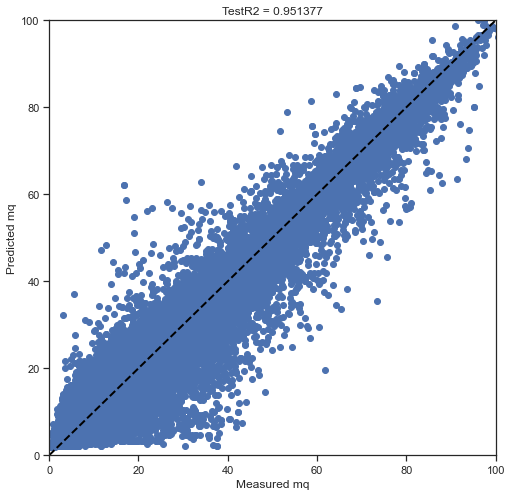

In [35]:
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 100, 0, 100])
plt.scatter(yreg_test, yreg_pred)
plt.plot([0,160],[0,160],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted mq') # Predicted values on y axis
plt.xlabel('Measured mq') 
plt.title('TestR2 = %f'%(test_R2_rgd_hpt))

In [36]:
X = yreg_pred.reshape(-1,1)
Y = xreg_test
rfr.fit(X, Y)
output = [0]

input = rfr.predict([output])

print(input)

[[0.67408311 0.99933614 0.89237155 0.65372303 0.1119013  0.30353232]]


In [37]:
scaler.inverse_transform(input)

array([[1.45420624e+05, 2.59637000e+05, 1.34000146e+05, 7.10957886e+04,
        1.67140777e+00, 2.82119395e+00]])

Using KNN

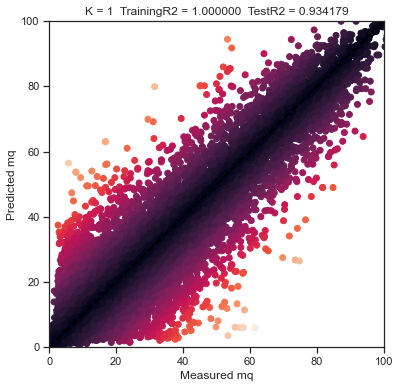

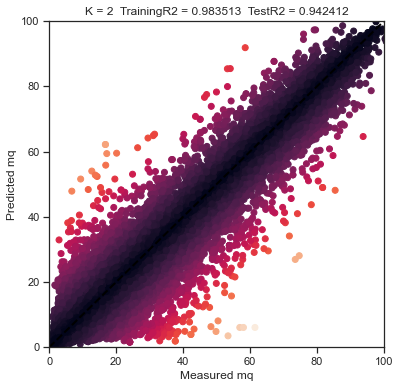

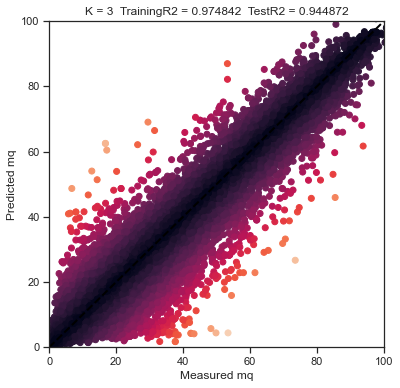

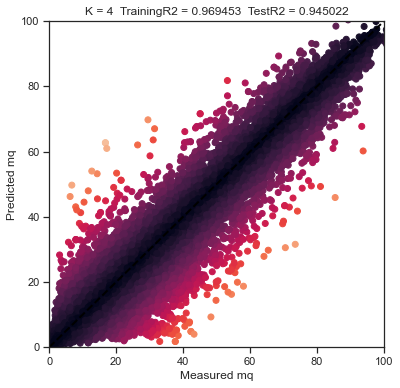

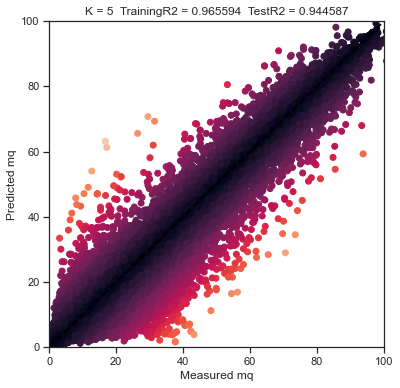

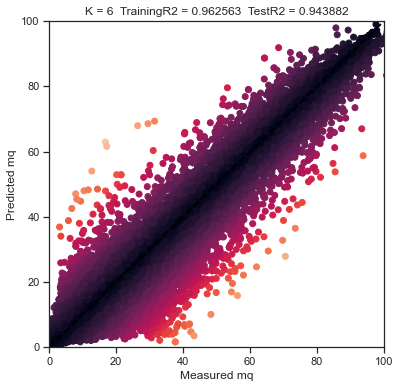

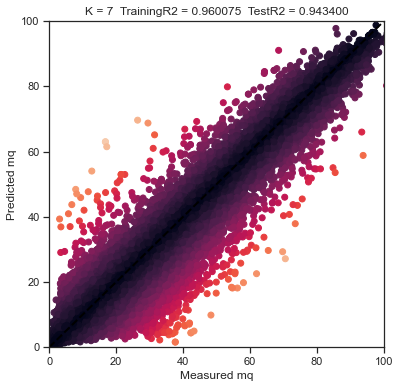

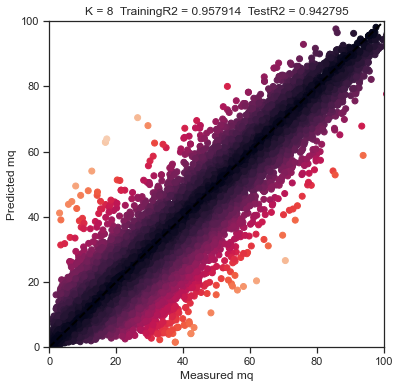

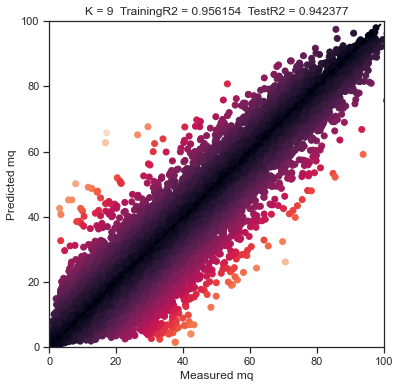

In [38]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt


rmse_val = [] # To store rmse values for different k
k_val = []    # To store values of K
R2 = []       # To store R2

for K in range(1, 10, 1):

    k_val.append(K)
    KNN = neighbors.KNeighborsRegressor(n_neighbors = K)

    KNN.fit(xreg_train, yreg_train)  # fit the model
    y_pred_KNN = KNN.predict(xreg_test) # make prediction on test set
    
    training_R2_KNN = KNN.score(xreg_train, yreg_train) # Compute training R2
    test_R2_KNN = KNN.score(xreg_test, yreg_test)       # Compute test R2
    R2.append(test_R2_KNN)
    
    error = sqrt(mean_squared_error(yreg_test, y_pred_KNN)) #calculate rmse
    rmse_val.append(error)                         #store rmse values
    er=abs(yreg_test - y_pred_KNN)  
   
   
    fig = plt.figure(K, figsize=(6, 6))
    plt.axis([0, 100, 0, 100])
    plt.scatter(yreg_test, y_pred_KNN, c = er)
    plt.plot([0, 100],[0, 100], color='black', linewidth=2, linestyle='--')
    plt.ylabel('Predicted mq') # Predicted values on y axis
    plt.xlabel('Measured mq') 
    plt.title('K = %s  TrainingR2 = %f  TestR2 = %f'%(K, training_R2_KNN, test_R2_KNN))

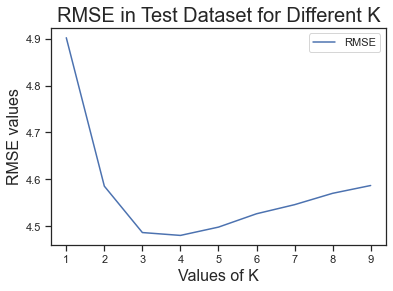

In [39]:
#plotting the rmse values against k values
plt.plot(k_val, rmse_val, label = 'RMSE')
plt.xlabel ('Values of K', fontsize = 16)
plt.ylabel ('RMSE values', fontsize = 16)
plt.title ('RMSE in Test Dataset for Different K', fontsize = 20)
plt.legend()

In [40]:
KNN = neighbors.KNeighborsRegressor(n_neighbors = 4)
KNN.fit(xreg_train, yreg_train)
y_pred_KNN = KNN.predict(xreg_test)
test_RMSE_KNN = sqrt(mean_squared_error(yreg_test, y_pred_KNN))
print("RMSE = ", test_RMSE_KNN)

RMSE =  4.480260936722041


In [41]:
X_KNN = y_pred_KNN.reshape(-1,1)
Y_KNN = xreg_test

KNN.fit(X_KNN, Y_KNN)
output = [0]

input = KNN.predict([output])

print(input)
print()

[[0.67206961 0.99933614 0.88897742 0.68280857 0.10107267 0.2990457 ]]



In [42]:
scaler.inverse_transform(input)

array([[1.44986250e+05, 2.59637000e+05, 1.33586750e+05, 7.38443750e+04,
        1.60643601e+00, 2.79427420e+00]])

Now running RF on the entire data set just to compare difference

In [43]:
rfr = RandomForestRegressor(random_state = 12, bootstrap = True, max_depth = 15, min_samples_split = 10, n_estimators = 200)

rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=10, n_estimators=200,
                      random_state=12)

In [44]:
y_pred = rfr.predict(x_test)
test_R2 = rfr.score(x_test, y_test)
test_RMSE = sqrt(mean_squared_error(y_test, y_pred))
print("R2 = ", test_R2)
print("RMSE = ", test_RMSE)


R2 =  0.9753457847156681
RMSE =  3.0002420532412266


Text(0.5, 1.0, 'TestR2 = 0.975346')

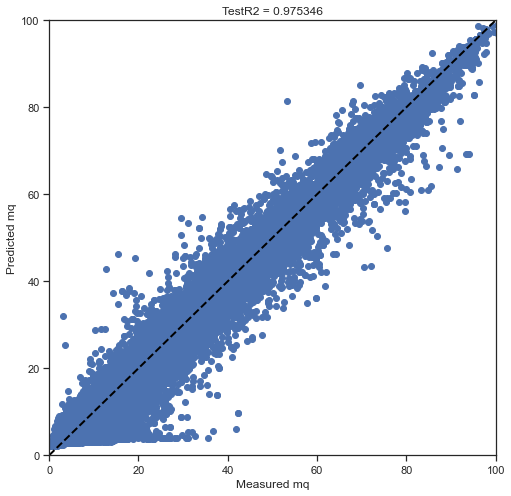

In [45]:
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 100, 0, 100])
plt.scatter(y_test, y_pred)
plt.plot([0,160],[0,160],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted mq') # Predicted values on y axis
plt.xlabel('Measured mq') 
plt.title('TestR2 = %f'%(test_R2))

For SVM

In [46]:
# Import the SVM library
from sklearn.svm import SVR
svm_regressor_MQ = SVR(C = 1, kernel = 'rbf', gamma = 10) # Define the SVM model parameters 

svm_regressor_MQ.fit(xreg_train, yreg_train)

SVR(C=1, gamma=10)

In [47]:
y_pred_svm = svm_regressor_MQ.predict(xreg_test)

test_R2_svm = svm_regressor_MQ.score(xreg_test, yreg_test) #test R2 for regression data
test_RMSE_svm = sqrt(mean_squared_error(yreg_test, y_pred_svm))
print("R2 = ", test_R2_svm)
print("RMSE = ", test_RMSE_svm)

R2 =  0.9032964305284078
RMSE =  5.941990519167349


Text(0.5, 1.0, 'TestR2 = 0.903296')

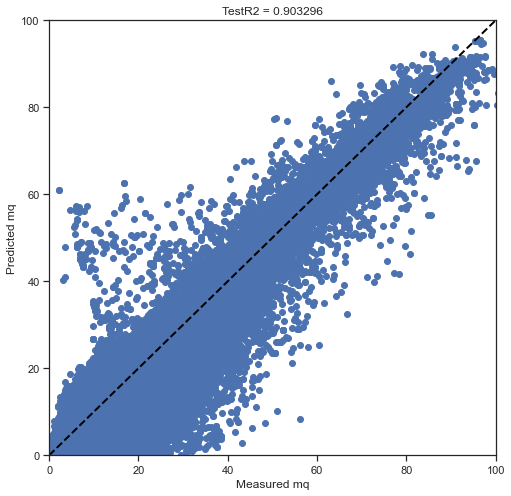

In [48]:
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 100, 0, 100])
plt.scatter(yreg_test, y_pred_svm)
plt.plot([0,160],[0,160],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted mq') # Predicted values on y axis
plt.xlabel('Measured mq') 
plt.title('TestR2 = %f'%(test_R2_svm))

In [51]:
param_grid_svm = {'C': [0.1, 1], 'gamma': [10], 'kernel': ['rbf']} 
 
grid_svm = GridSearchCV(SVR(), param_grid=param_grid_svm, cv=3, verbose=3) 

grid_svm.fit(xreg_train, yreg_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=0.1, gamma=10, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.870, total=25.7min
[CV] C=0.1, gamma=10, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 25.7min remaining:    0.0s


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.873, total=23.4min
[CV] C=0.1, gamma=10, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 49.2min remaining:    0.0s


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.873, total=24.1min
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.903, total=14.7min
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.906, total=14.7min
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.905, total=15.2min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 117.8min finished


GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 1], 'gamma': [10], 'kernel': ['rbf']},
             verbose=3)

In [53]:
cv_results = pd.DataFrame(grid_svm.cv_results_)
cv_results_tiny = cv_results[['param_C', 'param_gamma', 'mean_test_score']]
cv_results_tiny.sort_values(by='mean_test_score', ascending=False).head(5)

param_C param_gamma  mean_test_score
1       1          10         0.904640
0     0.1          10         0.872072

In [54]:
svm_regressor_MQHPT = SVR(C = 1, kernel = 'rbf', gamma = 10) # Define the new SVM model parameters 

svm_regressor_MQHPT.fit(xreg_train, yreg_train)

SVR(C=1, gamma=10)

In [55]:
y_pred_svm_HPT = svm_regressor_MQHPT.predict(xreg_test)

test_R2_svm_HPT = svm_regressor_MQHPT.score(xreg_test, yreg_test)
test_RMSE_svm_HPT = sqrt(mean_squared_error(yreg_test, y_pred_svm_HPT))
print("R2 = ", test_R2_svm_HPT)
print("RMSE = ", test_RMSE_svm_HPT)

R2 =  0.9032964305284078
RMSE =  5.941990519167349


Text(0.5, 1.0, 'TestR2 = 0.903296')

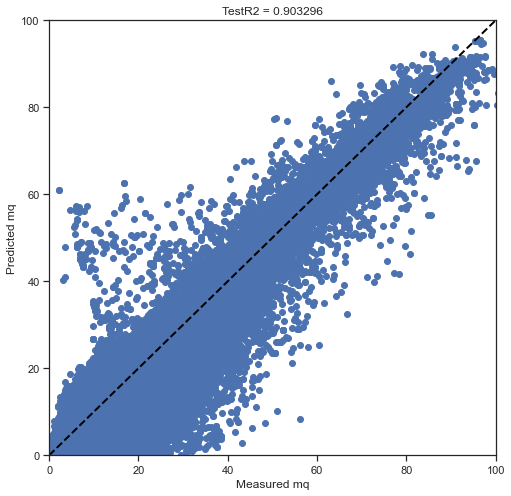

In [56]:
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 100, 0, 100])
plt.scatter(yreg_test, y_pred_svm_HPT)
plt.plot([0,160],[0,160],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted mq') # Predicted values on y axis
plt.xlabel('Measured mq') 
plt.title('TestR2 = %f'%(test_R2_svm_HPT))

Now lets compare RMSE for all 5 models
1. RF with all variables
2. RF with chosen variables after feature importance
3. RF with chosen variables and hyperparameter tuning
4. K-Nearest Neighbours
5. SVM

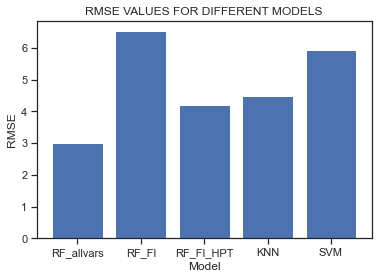

In [57]:
labels = ['RF_allvars', 'RF_FI', 'RF_FI_HPT', 'KNN', 'SVM']
RMSE_mq = [test_RMSE, test_RMSE_rgd, test_RMSE_rgd_hpt, test_RMSE_KNN, test_RMSE_svm_HPT]
models = np.arange (len(labels))
plt.bar(models, RMSE_mq)
plt.xticks(models, labels)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE VALUES FOR DIFFERENT MODELS")
plt.show()

## Regression for mq.FIELD.FIELD.QOP

In [58]:
data_scaled_2_df = pd.DataFrame (data_scaled, columns = ['CGP','COP','CWI','CWP','PERM.1','PERM.2','PORO.1','PORO.2','NTG.1','NTG.2','FAULT.1','FAULT.2','COW.1','CW.1','SORW.1','KRW_SWRO.1','COG.1','CG.1','SGR.1','SORG.1'])
data_scaled_2_df = data_scaled_2_df.join(CHAN)

In [59]:
mq_QOP_raw = data_subset[['mq.FIELD.FIELD.QOP']].to_numpy()
mq_QOP_raw_df = pd.DataFrame(mq_QOP_raw, columns = ['mq.FIELD.FIELD.QOP'])
data_scaled_2_df['mq.FIELD.FIELD.QOP'] = mq_QOP_raw_df

In [60]:
data_scaled_2_df.isnull().sum().sum()

0

Train/Test

In [61]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(data_scaled_2_df, test_size = 0.30, random_state = 12 )

In [62]:
x_QOP_train = train.drop('mq.FIELD.FIELD.QOP', axis=1)
y_QOP_train = train['mq.FIELD.FIELD.QOP']             

x_QOP_test = test.drop('mq.FIELD.FIELD.QOP', axis = 1)
y_QOP_test = test['mq.FIELD.FIELD.QOP']

In [63]:
print("TRAINING DATA")
print("Size of x_QOP_train is:", x_QOP_train.shape)
print("Size of y_QOP_train is:", y_QOP_train.shape)
print("TEST DATA")
print("Size of x_QOP_test is:", x_QOP_test.shape)
print("Size of y_QOP_test is:", y_QOP_test.shape)

TRAINING DATA
Size of x_QOP_train is: (140497, 28)
Size of y_QOP_train is: (140497,)
TEST DATA
Size of x_QOP_test is: (60214, 28)
Size of y_QOP_test is: (60214,)


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

rfr = RandomForestRegressor(random_state = 12, bootstrap = True, max_depth = 6, min_samples_split = 20, n_estimators = 1000)

rfr.fit(x_QOP_train, y_QOP_train)

RandomForestRegressor(max_depth=6, min_samples_split=20, n_estimators=1000,
                      random_state=12)

In [65]:
y_QOP_pred = rfr.predict(x_QOP_test)
test_R2_QOP = rfr.score(x_QOP_test, y_QOP_test)
test_RMSE_QOP = sqrt(mean_squared_error(y_QOP_test, y_QOP_pred))
print("R2 = ", test_R2_QOP)
print("RMSE = ", test_RMSE_QOP)


R2 =  0.9567366186162464
RMSE =  4.702973432395602


Text(0.5, 1.0, 'TestR2 = 0.956737')

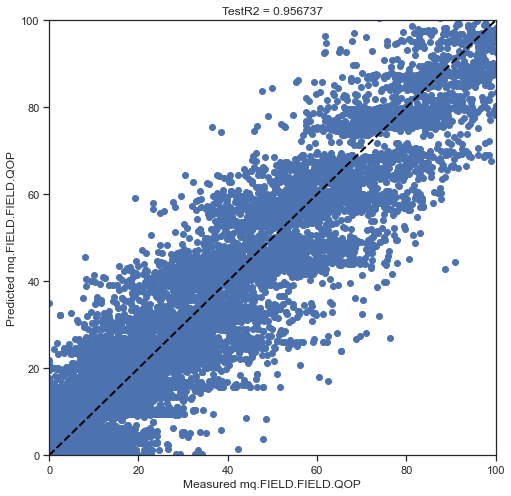

In [66]:
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 100, 0, 100])
plt.scatter(y_QOP_test, y_QOP_pred)
plt.plot([0,160],[0,160],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted mq.FIELD.FIELD.QOP') # Predicted values on y axis
plt.xlabel('Measured mq.FIELD.FIELD.QOP') 
plt.title('TestR2 = %f'%(test_R2_QOP))

Finding Variable Importance

In [67]:
importances = list(rfr.feature_importances_)

In [68]:
Input_Features = data_subset[['CGP','COP','CWI','CWP','PERM.1','PERM.2','PORO.1','PORO.2','NTG.1','NTG.2','FAULT.1','FAULT.2','COW.1','CW.1','SORW.1','KRW_SWRO.1','COG.1','CG.1','SGR.1','SORG.1','CHAN.1','CHAN.2','CHAN.3','CHAN.4','CHAN.5','CHAN.6','CHAN.7','CHAN.8']]
Output_Feature = mq_QOP_raw_df

In [69]:
feature_list=list(Input_Features[['CGP','COP','CWI','CWP','PERM.1','PERM.2','PORO.1','PORO.2','NTG.1','NTG.2','FAULT.1','FAULT.2','COW.1','CW.1','SORW.1','KRW_SWRO.1','COG.1','CG.1','SGR.1','SORG.1','CHAN.1','CHAN.2','CHAN.3','CHAN.4','CHAN.5','CHAN.6','CHAN.7','CHAN.8']].columns)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: COP                  Importance: 0.97
Variable: CWP                  Importance: 0.01
Variable: PERM.1               Importance: 0.01
Variable: CGP                  Importance: 0.0
Variable: CWI                  Importance: 0.0
Variable: PERM.2               Importance: 0.0
Variable: PORO.1               Importance: 0.0
Variable: PORO.2               Importance: 0.0
Variable: NTG.1                Importance: 0.0
Variable: NTG.2                Importance: 0.0
Variable: FAULT.1              Importance: 0.0
Variable: FAULT.2              Importance: 0.0
Variable: COW.1                Importance: 0.0
Variable: CW.1                 Importance: 0.0
Variable: SORW.1               Importance: 0.0
Variable: KRW_SWRO.1           Importance: 0.0
Variable: COG.1                Importance: 0.0
Variable: CG.1                 Importance: 0.0
Variable: SGR.1                Importance: 0.0
Variable: SORG.1               Importance: 0.0
Variable: CHAN.1               Importance: 0.0
Variable: 

<AxesSubplot:xlabel='Importance', ylabel='Input_Features'>

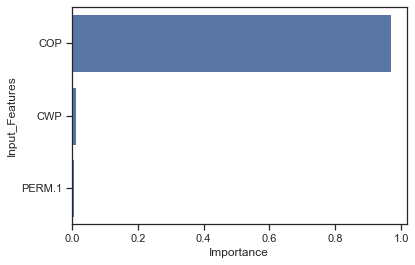

In [70]:
feature_dataframe = pd.DataFrame(data = feature_list, columns = ['Input_Features'])

feature_dataframe['Importance'] = importances
feature_dataframe.sort_values('Importance',inplace=True)
feature_dataframe = feature_dataframe.nlargest(3, 'Importance')
sns.set(style = 'ticks')
sns.barplot(x = 'Importance', y = 'Input_Features', data = feature_dataframe, color="b")

Regression on 3 most important features

In [71]:
regressioninput2 = data_subset[['COP','CWP','PERM.1']].to_numpy() 
regressionoutput2 = data_subset[['mq.FIELD.FIELD.QOP']].to_numpy()

In [72]:
regressiondata2_scaled = scaler.fit_transform(regressioninput2)
regressiondata2_scaled_df = pd.DataFrame (regressiondata2_scaled, columns = ['COP','CWP','PERM.1'])

In [73]:
regressionoutput2_df = pd.DataFrame(regressionoutput2, columns = ['mq.FIELD.FIELD.QOP'])
regressiondata2_scaled_df['mq.FIELD.FIELD.QOP'] = regressionoutput2_df

In [74]:
regressiondata2_scaled_df.isnull().sum().sum()

0

In [75]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(regressiondata2_scaled_df, test_size = 0.30, random_state = 12 )

In [76]:
xreg2_train = train.drop('mq.FIELD.FIELD.QOP', axis=1) 
yreg2_train = train['mq.FIELD.FIELD.QOP']              

xreg2_test = test.drop('mq.FIELD.FIELD.QOP', axis = 1) 
yreg2_test = test['mq.FIELD.FIELD.QOP']

In [77]:
print("TRAINING DATA")
print("Size of xreg2_train is:", xreg2_train.shape)
print("Size of yreg2_train is:", yreg2_train.shape)
print("TEST DATA")
print("Size of xreg2_test is:", xreg2_test.shape)
print("Size of yreg2_test is:", yreg2_test.shape)

TRAINING DATA
Size of xreg2_train is: (140497, 3)
Size of yreg2_train is: (140497,)
TEST DATA
Size of xreg2_test is: (60214, 3)
Size of yreg2_test is: (60214,)


RF with random Hyperparameter selection

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

rfr = RandomForestRegressor(random_state = 12, bootstrap = True, max_depth = 6, min_samples_split = 20, n_estimators = 1000)

rfr.fit(xreg2_train, yreg2_train)

RandomForestRegressor(max_depth=6, min_samples_split=20, n_estimators=1000,
                      random_state=12)

In [79]:
yreg2_pred = rfr.predict(xreg2_test)
test_R2_rgd2 = rfr.score(xreg2_test, yreg2_test) #test R2 for regression data
test_RMSE_rgd2 = sqrt(mean_squared_error(yreg2_test, yreg2_pred))
print("R2 = ", test_R2_rgd2)
print("RMSE = ", test_RMSE_rgd2)

R2 =  0.948184927141809
RMSE =  5.146836259746507


Text(0.5, 1.0, 'TestR2 = 0.948185')

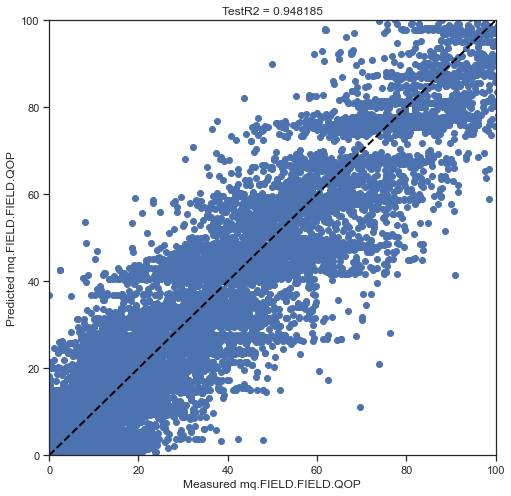

In [80]:
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 100, 0, 100])
plt.scatter(yreg2_test, yreg2_pred)
plt.plot([0,160],[0,160],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted mq.FIELD.FIELD.QOP') # Predicted values on y axis
plt.xlabel('Measured mq.FIELD.FIELD.QOP') 
plt.title('TestR2 = %f'%(test_R2_rgd2))

Hyperparameter tuning Using GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [6, 12, 18], 'min_samples_split': [10, 20], 'n_estimators': [100, 200]}

grid = GridSearchCV(RandomForestRegressor(random_state=12), param_grid=param_grid, verbose=3, cv=5)

grid.fit(xreg2_train, yreg2_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100, score=0.949, total=  24.9s
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.8s remaining:    0.0s


[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100, score=0.947, total=  24.6s
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   49.4s remaining:    0.0s


[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100, score=0.949, total=  24.5s
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100, score=0.949, total=  34.2s
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100, score=0.951, total=  24.5s
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=200, score=0.949, total=  51.5s
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=200, score=0.947, total=  56.8s
[CV] bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=200, score=0.949, total=  49.0s
[CV] bootstrap=Tru

[CV]  bootstrap=True, max_depth=18, min_samples_split=10, n_estimators=200, score=0.961, total= 2.1min
[CV] bootstrap=True, max_depth=18, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=18, min_samples_split=20, n_estimators=100, score=0.960, total=  59.6s
[CV] bootstrap=True, max_depth=18, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=18, min_samples_split=20, n_estimators=100, score=0.957, total= 1.1min
[CV] bootstrap=True, max_depth=18, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=18, min_samples_split=20, n_estimators=100, score=0.960, total=  59.3s
[CV] bootstrap=True, max_depth=18, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=18, min_samples_split=20, n_estimators=100, score=0.959, total= 1.1min
[CV] bootstrap=True, max_depth=18, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=18, min_samples_split=20, n_estimators=100, score=0.961, total=  56.6s
[CV] bo

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 69.0min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12),
             param_grid={'bootstrap': [True], 'max_depth': [6, 12, 18],
                         'min_samples_split': [10, 20],
                         'n_estimators': [100, 200]},
             verbose=3)

In [82]:
cv_results = pd.DataFrame(grid.cv_results_)

# generate a subset of the table
cv_results_tiny = cv_results[['param_max_depth', 'param_bootstrap', 'param_n_estimators', 'param_min_samples_split', 'mean_test_score','std_test_score']]

# rank them based on test scores
cv_results_tiny.sort_values(by='mean_test_score', ascending=False).head(3)

param_max_depth param_bootstrap param_n_estimators param_min_samples_split  \
9               18            True                200                      10   
8               18            True                100                      10   
11              18            True                200                      20   

    mean_test_score  std_test_score  
9          0.960078        0.001194  
8          0.959963        0.001231  
11         0.959482        0.001178

RF with tuned Hyper parameters

In [83]:
rfr_QOP = RandomForestRegressor(random_state = 12, bootstrap = True, max_depth = 18, min_samples_split = 10, n_estimators = 200)

rfr_QOP.fit(xreg2_train, yreg2_train)

RandomForestRegressor(max_depth=18, min_samples_split=10, n_estimators=200,
                      random_state=12)

In [84]:
yreg2_pred = rfr_QOP.predict(xreg2_test)
test_R2_rgd2_hpt = rfr_QOP.score(xreg2_test, yreg2_test) #test R2 for regression data
test_RMSE_rgd2_hpt = sqrt(mean_squared_error(yreg2_test, yreg2_pred))
print("R2 = ", test_R2_rgd2_hpt)
print("RMSE = ", test_RMSE_rgd2_hpt)

R2 =  0.9611114535736479
RMSE =  4.458852957311058


Text(0.5, 1.0, 'TestR2 = 0.961111')

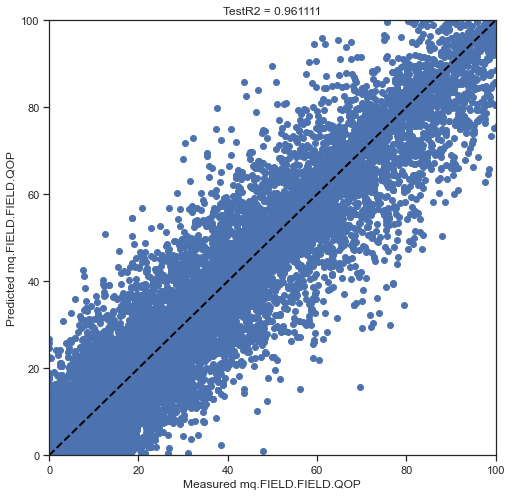

In [85]:
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 100, 0, 100])
plt.scatter(yreg2_test, yreg2_pred)
plt.plot([0,160],[0,160],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted mq.FIELD.FIELD.QOP') # Predicted values on y axis
plt.xlabel('Measured mq.FIELD.FIELD.QOP') 
plt.title('TestR2 = %f'%(test_R2_rgd2_hpt))

Finding input variables for zero mq.FIELD.FIELD.QOP

In [86]:
X = yreg2_pred.reshape(-1,1)
Y = xreg2_test
rfr_QOP.fit(X, Y)
output = [0]

input = rfr_QOP.predict([output])

print(input)

[[0.99494005 0.52046241 0.57866521]]


In [87]:
scaler.inverse_transform(input)

array([[146492.71124367, 112279.87582773,   1657.33042118]])

Using KNN

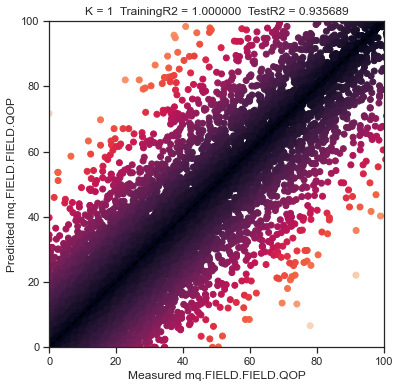

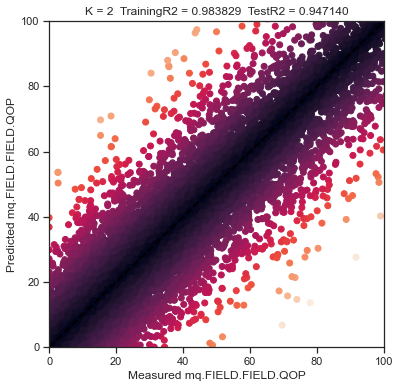

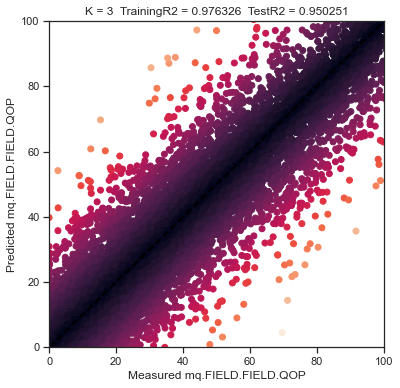

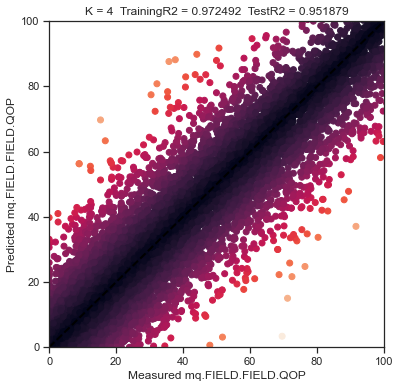

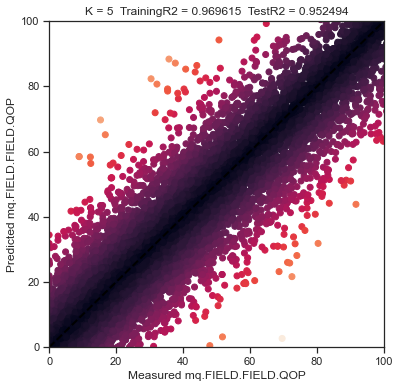

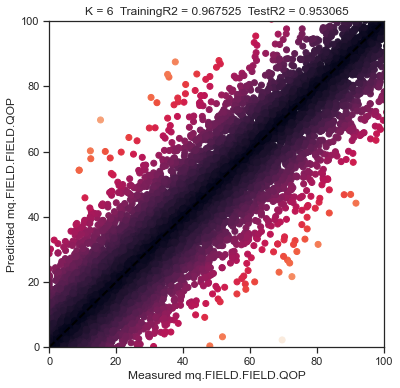

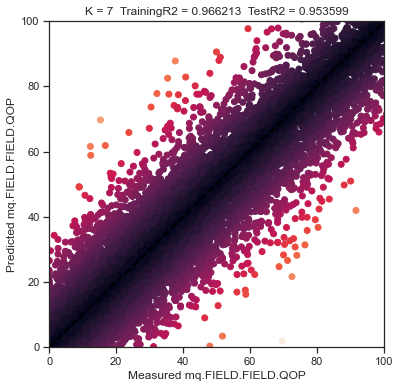

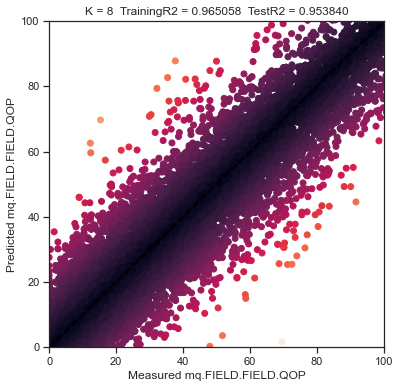

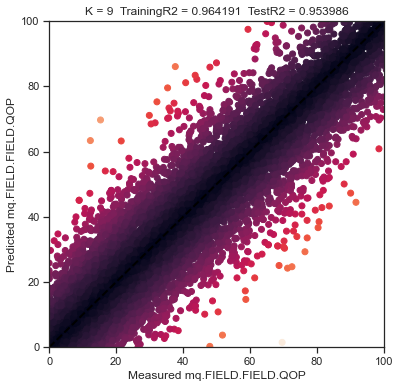

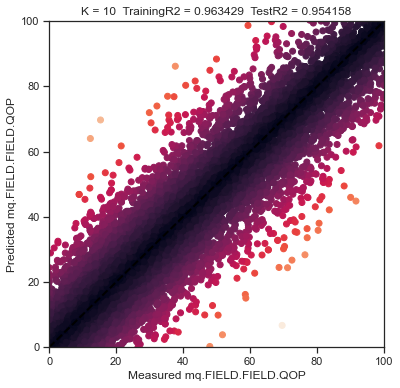

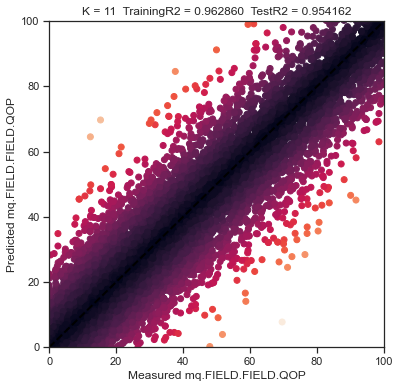

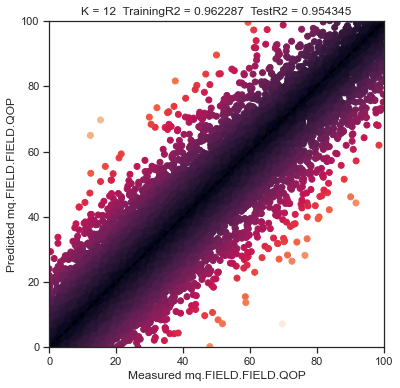

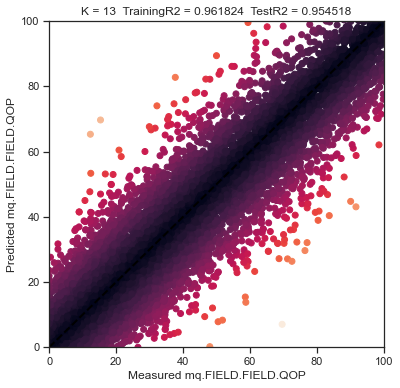

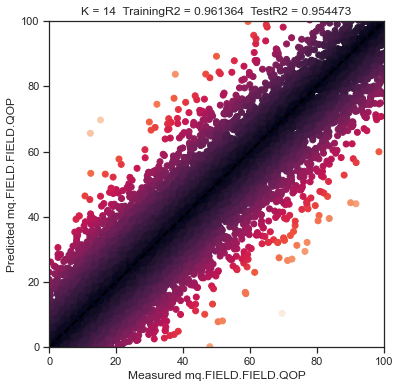

In [88]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt


rmse_val_QOP = [] # To store rmse values for different k
k_val_QOP = []    # To store values of K
R2_QOP = []       # To store R2

for K in range(1, 15, 1):

    k_val_QOP.append(K)
    KNN_QOP = neighbors.KNeighborsRegressor(n_neighbors = K)

    KNN_QOP.fit(xreg2_train, yreg2_train)  # fit the model
    y_pred_KNNQOP = KNN_QOP.predict(xreg2_test) # make prediction on test set
    
    training_R2_KNNQOP = KNN_QOP.score(xreg2_train, yreg2_train) # Compute training R2
    test_R2_KNNQOP = KNN_QOP.score(xreg2_test, yreg2_test)       # Compute test R2
    R2_QOP.append(test_R2_KNNQOP)
    
    error_QOP = sqrt(mean_squared_error(yreg2_test, y_pred_KNNQOP)) #calculate rmse
    rmse_val_QOP.append(error_QOP)                         #store rmse values
    er_QOP=abs(yreg2_test - y_pred_KNNQOP)  
   

    fig = plt.figure(K, figsize=(6, 6))
    plt.axis([0, 100, 0, 100])
    plt.scatter(yreg2_test, y_pred_KNNQOP, c = er_QOP)
    plt.plot([0, 100],[0, 100], color='black', linewidth=2, linestyle='--')
    plt.ylabel('Predicted mq.FIELD.FIELD.QOP') # Predicted values on y axis
    plt.xlabel('Measured mq.FIELD.FIELD.QOP') 
    plt.title('K = %s  TrainingR2 = %f  TestR2 = %f'%(K, training_R2_KNNQOP, test_R2_KNNQOP))

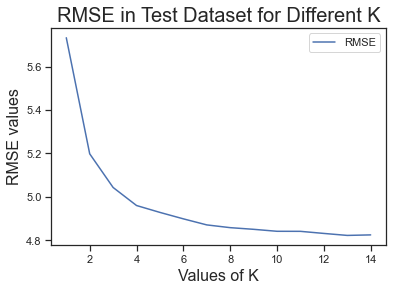

In [89]:
#plotting the rmse values against k values
plt.plot(k_val_QOP, rmse_val_QOP, label = 'RMSE')
plt.xlabel ('Values of K', fontsize = 16)
plt.ylabel ('RMSE values', fontsize = 16)
plt.title ('RMSE in Test Dataset for Different K', fontsize = 20)
plt.legend()

In [90]:
KNN_QOP = neighbors.KNeighborsRegressor(n_neighbors = 9)
KNN_QOP.fit(xreg2_train, yreg2_train)
y_pred_KNNQOP = KNN_QOP.predict(xreg2_test)
test_RMSE_KNNQOP = sqrt(mean_squared_error(yreg2_test, y_pred_KNNQOP))
print("RMSE = ", test_RMSE_KNNQOP)

RMSE =  4.85019982320012


In [91]:
X_KNNQOP = y_pred_KNNQOP.reshape(-1,1)
Y_KNNQOP = xreg2_test

KNN_QOP = neighbors.KNeighborsRegressor(n_neighbors = 9)
KNN_QOP.fit(X_KNNQOP, Y_KNNQOP)
output = [0]

input = KNN_QOP.predict([output])

print(input)

[[0.94674941 0.59884558 0.65053142]]


In [92]:
scaler.inverse_transform(input)

array([[140623.22222222, 129189.55555556,   1801.06283944]])

Carrying out RF on entire dataset to compare

In [93]:
rfr = RandomForestRegressor(random_state = 12, bootstrap = True, max_depth = 18, min_samples_split = 10, n_estimators = 200)

rfr.fit(x_QOP_train, y_QOP_train)

RandomForestRegressor(max_depth=18, min_samples_split=10, n_estimators=200,
                      random_state=12)

In [94]:
y_QOP_pred = rfr.predict(x_QOP_test)
test_R2_QOP = rfr.score(x_QOP_test, y_QOP_test)
test_RMSE_QOP = sqrt(mean_squared_error(y_QOP_test, y_QOP_pred))
print("R2 = ", test_R2_QOP)
print("RMSE = ", test_RMSE_QOP)


R2 =  0.9880106155377443
RMSE =  2.4757725236722057


Text(0.5, 1.0, 'TestR2 = 0.988011')

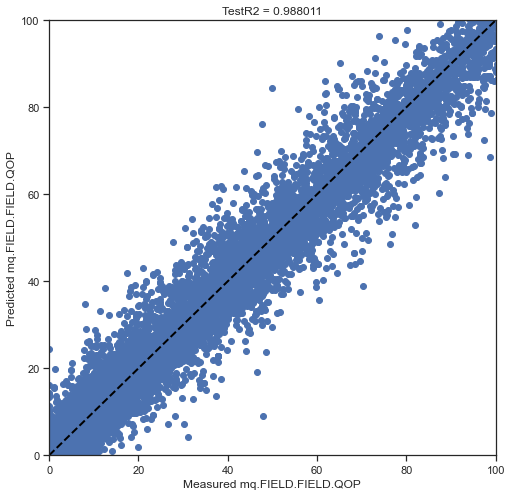

In [95]:
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 100, 0, 100])
plt.scatter(y_QOP_test, y_QOP_pred)
plt.plot([0,160],[0,160],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted mq.FIELD.FIELD.QOP') # Predicted values on y axis
plt.xlabel('Measured mq.FIELD.FIELD.QOP') 
plt.title('TestR2 = %f'%(test_R2_QOP))

Using SVM

In [96]:
# Import the SVM library
from sklearn.svm import SVR
svm_regressor = SVR(C = 1, kernel = 'rbf', gamma = 10) # Define the SVM model parameters 

svm_regressor.fit(xreg2_train, yreg2_train)

SVR(C=1, gamma=10)

In [97]:
y_pred_svmQOP = svm_regressor.predict(xreg2_test)

test_R2_svmQOP = svm_regressor.score(xreg2_test, yreg2_test) #test R2 for regression data
test_RMSE_svmQOP = sqrt(mean_squared_error(yreg2_test, y_pred_svmQOP))
print("R2 = ", test_R2_svmQOP)
print("RMSE = ", test_RMSE_svmQOP)

R2 =  0.9472353625796052
RMSE =  5.193782687810377


Text(0.5, 1.0, 'TestR2 = 0.947235')

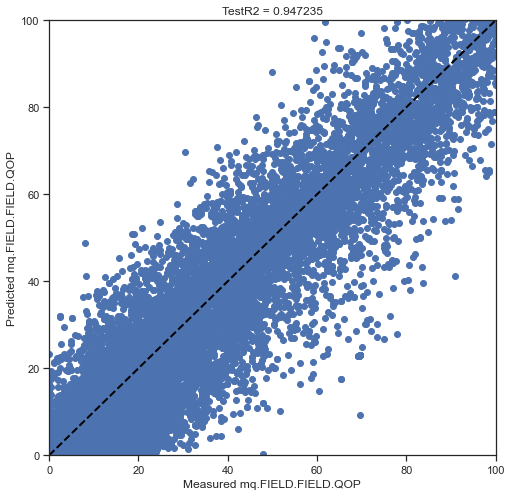

In [98]:
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 100, 0, 100])
plt.scatter(yreg2_test, y_pred_svmQOP)
plt.plot([0,160],[0,160],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted mq.FIELD.FIELD.QOP') # Predicted values on y axis
plt.xlabel('Measured mq.FIELD.FIELD.QOP') 
plt.title('TestR2 = %f'%(test_R2_svmQOP))

In [99]:
param_grid_svmQOP = {'C': [1, 10], 'gamma': [10], 'kernel': ['rbf']} 
 
grid_svmQOP = GridSearchCV(SVR(), param_grid=param_grid_svmQOP, cv=3, verbose=3) 

grid_svmQOP.fit(xreg2_train, yreg2_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=1, gamma=10, kernel=rbf .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........... C=1, gamma=10, kernel=rbf, score=0.945, total= 8.8min
[CV] C=1, gamma=10, kernel=rbf .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.8min remaining:    0.0s


[CV] ........... C=1, gamma=10, kernel=rbf, score=0.947, total= 8.5min
[CV] C=1, gamma=10, kernel=rbf .......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 17.3min remaining:    0.0s


[CV] ........... C=1, gamma=10, kernel=rbf, score=0.948, total= 8.6min
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .......... C=10, gamma=10, kernel=rbf, score=0.947, total=10.7min
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .......... C=10, gamma=10, kernel=rbf, score=0.949, total=11.0min
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .......... C=10, gamma=10, kernel=rbf, score=0.950, total=10.7min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 58.3min finished


GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [1, 10], 'gamma': [10], 'kernel': ['rbf']},
             verbose=3)

In [102]:
cv_results = pd.DataFrame(grid_svmQOP.cv_results_)
cv_results_tiny = cv_results[['param_C', 'param_gamma', 'mean_test_score']]
cv_results_tiny.sort_values(by='mean_test_score', ascending=False).head(5)

param_C param_gamma  mean_test_score
1      10          10         0.948971
0       1          10         0.946737

In [103]:
svm_regressor_HPT = SVR(C = 10, kernel = 'rbf', gamma = 10) # Define the SVM model parameters 

svm_regressor_HPT.fit(xreg2_train, yreg2_train)

SVR(C=10, gamma=10)

In [104]:
y_pred_svmQOP_HPT = svm_regressor_HPT.predict(xreg2_test)

test_R2_svmQOP_HPT = svm_regressor_HPT.score(xreg2_test, yreg2_test)
test_RMSE_svmQOP_HPT = sqrt(mean_squared_error(yreg2_test, y_pred_svmQOP_HPT))
print("R2 = ", test_R2_svmQOP_HPT)
print("RMSE = ", test_RMSE_svmQOP_HPT)

R2 =  0.948979041762327
RMSE =  5.107243928595942


Text(0.5, 1.0, 'TestR2 = 0.948979')

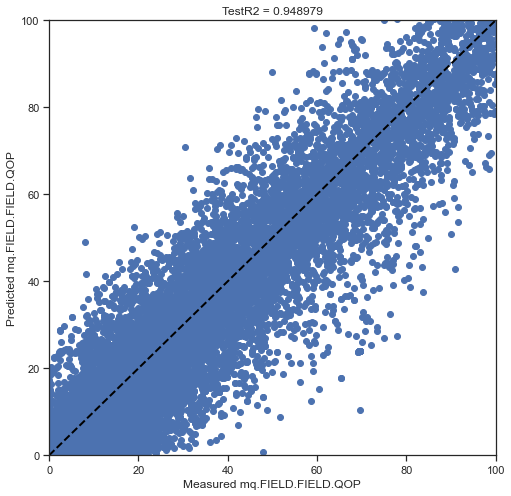

In [105]:
fig = plt.figure(1, figsize=(8, 8))
plt.axis([0, 100, 0, 100])
plt.scatter(yreg2_test, y_pred_svmQOP_HPT)
plt.plot([0,160],[0,160],color='black',linewidth=2, linestyle='--')
plt.ylabel('Predicted mq.FIELD.FIELD.QOP') # Predicted values on y axis
plt.xlabel('Measured mq.FIELD.FIELD.QOP') 
plt.title('TestR2 = %f'%(test_R2_svmQOP_HPT))

Comparing for all 5 models

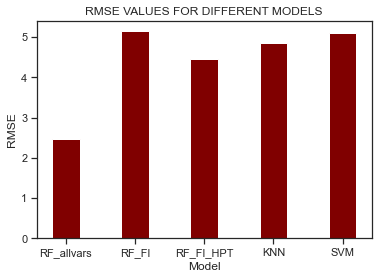

In [106]:
labels2 = ['RF_allvars', 'RF_FI', 'RF_FI_HPT', 'KNN', 'SVM']
RMSE_mqQOP = [test_RMSE_QOP, test_RMSE_rgd2, test_RMSE_rgd2_hpt, test_RMSE_KNNQOP, test_RMSE_svmQOP_HPT]
models_QOP = np.arange (len(labels2))
plt.bar(models_QOP, RMSE_mqQOP, color ='maroon', width = 0.4)
plt.xticks(models_QOP, labels2)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE VALUES FOR DIFFERENT MODELS")
plt.show()